In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ny=pd.read_csv("C://Users//siam_//Desktop//CSDA 1010//Final Project//NY_BNB_duration.csv")

In [3]:
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,longstay,shortstay,duration
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1,1,0,long
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1,0,1,short
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19,0,1,short
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365,1,0,long
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242,0,1,short


In [4]:
ny.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,longstay,shortstay
count,5.059900e+04,5.059900e+04,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,40379.000000,50599.000000,50599.000000,50599.000000,50599.000000
mean,2.137380e+07,7.893854e+07,40.728743,-73.950762,158.171782,7.531908,24.809225,1.405862,7.330916,112.785944,0.155695,0.844305
std,1.242864e+07,9.095944e+07,0.055004,0.047606,348.089562,22.454271,47.317882,1.695551,32.757485,135.891028,0.362569,0.362569
min,2.595000e+03,2.438000e+03,40.499790,-74.247870,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,1.009891e+07,8.925493e+06,40.689550,-73.982930,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,1.000000
50%,2.154642e+07,3.572660e+07,40.722880,-73.955050,105.000000,3.000000,6.000000,0.740000,1.000000,42.000000,0.000000,1.000000
75%,3.271780e+07,1.293330e+08,40.763030,-73.934200,175.000000,5.000000,25.000000,2.110000,2.000000,225.000000,0.000000,1.000000
max,4.058402e+07,3.143682e+08,40.916860,-73.712990,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000,1.000000,1.000000


In [5]:
ny.shape[0]

50599

In [6]:
ny.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
longstay                            int64
shortstay                           int64
duration                           object
dtype: object

In [7]:
ny.count()

id                                50599
name                              50582
host_id                           50599
host_name                         50036
neighbourhood_group               50599
neighbourhood                     50599
latitude                          50599
longitude                         50599
room_type                         50599
price                             50599
minimum_nights                    50599
number_of_reviews                 50599
last_review                       40379
reviews_per_month                 40379
calculated_host_listings_count    50599
availability_365                  50599
longstay                          50599
shortstay                         50599
duration                          50599
dtype: int64

In [8]:
ny.isna().sum()
# missing values

id                                    0
name                                 17
host_id                               0
host_name                           563
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
longstay                              0
shortstay                             0
duration                              0
dtype: int64

### Some Visualizations before Data Augmenting

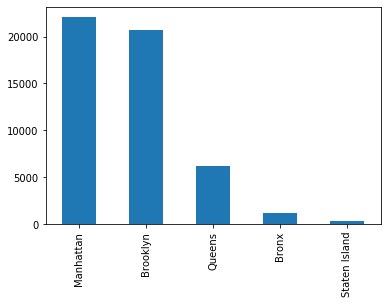

In [9]:
freq_table = pd.Series(ny['neighbourhood_group']).value_counts()
plt.figure()
freq_table.plot.bar();

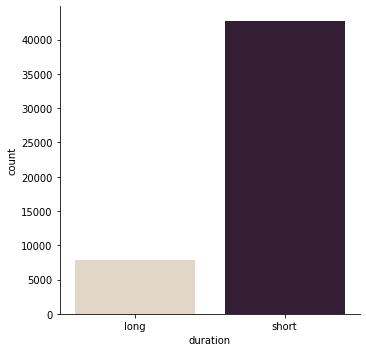

In [10]:
sns.catplot(x="duration", kind="count", palette="ch:.25", data=ny)

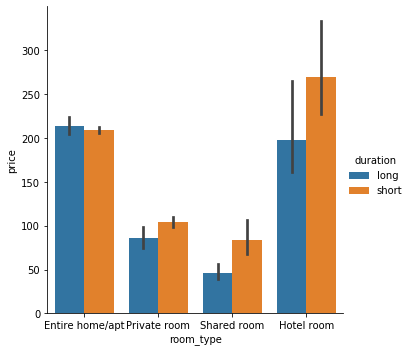

In [11]:
sns.catplot(x="room_type", y="price", hue="duration", kind="bar", data=ny)

In [12]:
ny.groupby(['room_type','duration'])['price'].mean()

room_type        duration
Entire home/apt  long        214.019242
                 short       208.420251
Hotel room       long        197.789474
                 short       269.190955
Private room     long         85.467999
                 short       103.994224
Shared room      long         46.305936
                 short        83.808100
Name: price, dtype: float64

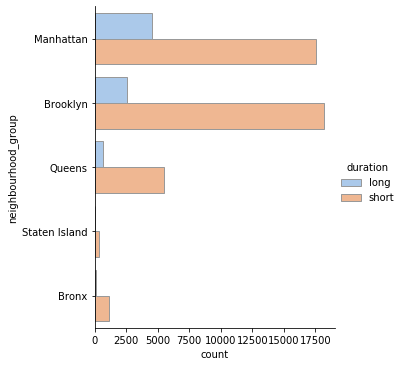

In [13]:
sns.catplot(y="neighbourhood_group", hue="duration", kind="count",
            palette="pastel", edgecolor=".6",
            data=ny);

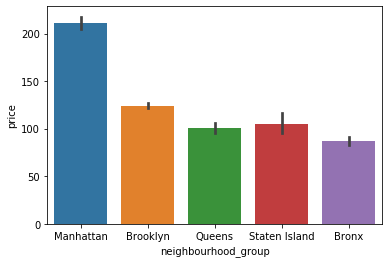

In [14]:
sns.barplot(x='neighbourhood_group',y='price',data=ny)

In [15]:
ny.groupby('neighbourhood_group').mean()[['price']]

,price
neighbourhood_group,
Bronx,86.948148
Brooklyn,124.384619
Manhattan,210.947621
Queens,100.476598
Staten Island,105.259259


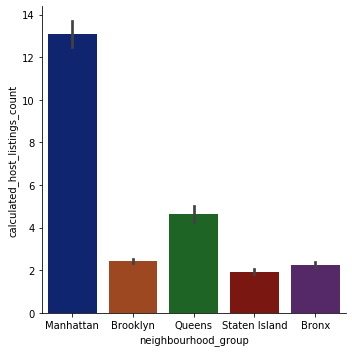

In [16]:
sns.catplot(x="neighbourhood_group", y="calculated_host_listings_count", kind="bar", palette="dark", data=ny)

In [17]:
ny.groupby('neighbourhood_group').mean()[['calculated_host_listings_count']]

,calculated_host_listings_count
neighbourhood_group,
Bronx,2.251852
Brooklyn,2.418708
Manhattan,13.070775
Queens,4.653163
Staten Island,1.941799


#### Dropping Columns 

In [18]:
ny= ny.drop(['id','name','host_id','host_name','neighbourhood','latitude','longitude','minimum_nights','last_review','duration'], axis= 1)

In [19]:
ny.head()

,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,longstay,shortstay
0,Manhattan,Entire home/apt,225,48,0.39,1,1,1,0
1,Brooklyn,Entire home/apt,89,295,4.67,1,1,0,1
2,Manhattan,Entire home/apt,200,78,0.60,1,19,0,1
3,Brooklyn,Private room,60,49,0.38,1,365,1,0
4,Manhattan,Private room,79,454,3.52,1,242,0,1


In [20]:
ny.isna().sum()

neighbourhood_group                   0
room_type                             0
price                                 0
number_of_reviews                     0
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
longstay                              0
shortstay                             0
dtype: int64

### Missing Values

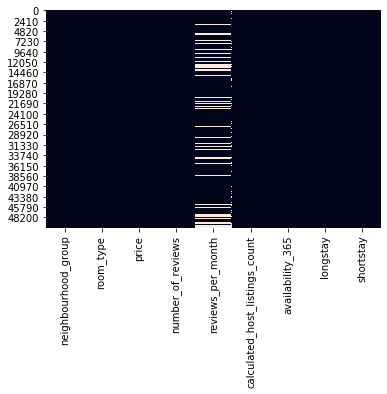

In [21]:
sns.heatmap(ny.isnull(), cbar=False)

In [22]:
ny.fillna(ny.mean(), inplace=True)
#use the mean to fill the missing values

In [23]:
ny.isna().sum()
#no more missing values

neighbourhood_group               0
room_type                         0
price                             0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
longstay                          0
shortstay                         0
dtype: int64

### Outliers

In [24]:
ny.describe()

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,longstay,shortstay
count,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000
mean,158.171782,24.809225,1.405862,7.330916,112.785944,0.155695,0.844305
std,348.089562,47.317882,1.514665,32.757485,135.891028,0.362569,0.362569
min,0.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,0.270000,1.000000,0.000000,0.000000,1.000000
50%,105.000000,6.000000,1.260000,1.000000,42.000000,0.000000,1.000000
75%,175.000000,25.000000,1.650000,2.000000,225.000000,0.000000,1.000000
max,10000.000000,675.000000,52.630000,310.000000,365.000000,1.000000,1.000000


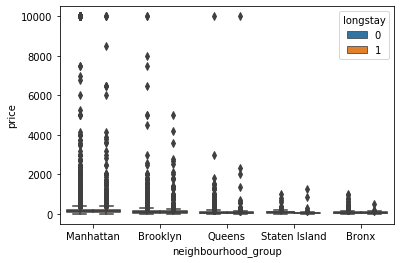

In [25]:
sns.boxplot(x="neighbourhood_group", y="price", hue="longstay", data=ny)
# we can see outliers in price

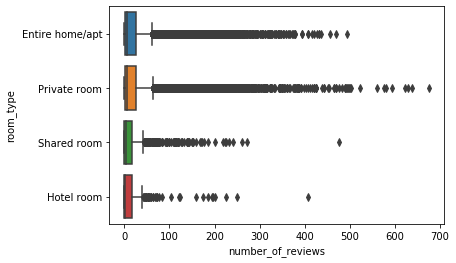

In [26]:
sns.boxplot( y=ny["room_type"], x=ny["number_of_reviews"] );
plt.show()
# outliers are also present in number of reviews

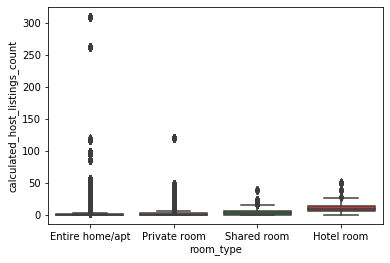

In [27]:
sns.boxplot( y=ny["calculated_host_listings_count"], x=ny["room_type"] );
plt.show()
# we can see outliers in host listings as well

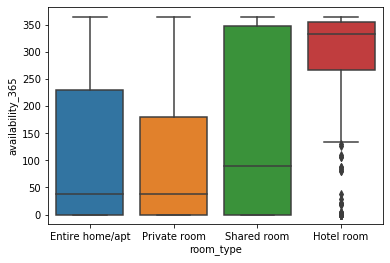

In [28]:
sns.boxplot( y=ny["availability_365"], x=ny["room_type"] );
plt.show()
# not many outliers in property avaiability are present

In [29]:
outlier_cols= ny[['price','calculated_host_listings_count','number_of_reviews']]

In [30]:
ny_cap= outlier_cols.apply(lambda x: x.clip(upper=np.percentile(x.dropna(), 98)))
# data capped to 98 percentile

In [31]:
ny_cap.describe()

,price,calculated_host_listings_count,number_of_reviews
count,50599.000000,50599.000000,50599.000000
mean,139.827012,5.014664,23.417508
std,105.480871,15.131980,40.001594
min,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000
50%,105.000000,1.000000,6.000000
75%,175.000000,2.000000,25.000000
max,550.000000,95.000000,181.040000


In [32]:
ny_cap.columns

Index(['price', 'calculated_host_listings_count', 'number_of_reviews'], dtype='object')

In [33]:
ny= ny.drop(['price','calculated_host_listings_count','number_of_reviews','shortstay'], axis= 1)

In [34]:
ny=pd.concat([ny_cap, ny], axis=1)

In [35]:
ny.describe()

,price,calculated_host_listings_count,number_of_reviews,reviews_per_month,availability_365,longstay
count,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000,50599.000000
mean,139.827012,5.014664,23.417508,1.405862,112.785944,0.155695
std,105.480871,15.131980,40.001594,1.514665,135.891028,0.362569
min,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.270000,0.000000,0.000000
50%,105.000000,1.000000,6.000000,1.260000,42.000000,0.000000
75%,175.000000,2.000000,25.000000,1.650000,225.000000,0.000000
max,550.000000,95.000000,181.040000,52.630000,365.000000,1.000000


In [36]:
ny.head()

,price,calculated_host_listings_count,number_of_reviews,neighbourhood_group,room_type,reviews_per_month,availability_365,longstay
0,225,1,48.00,Manhattan,Entire home/apt,0.39,1,1
1,89,1,181.04,Brooklyn,Entire home/apt,4.67,1,0
2,200,1,78.00,Manhattan,Entire home/apt,0.60,19,0
3,60,1,49.00,Brooklyn,Private room,0.38,365,1
4,79,1,181.04,Manhattan,Private room,3.52,242,0


### Visualizations

C:\Users\siam_\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


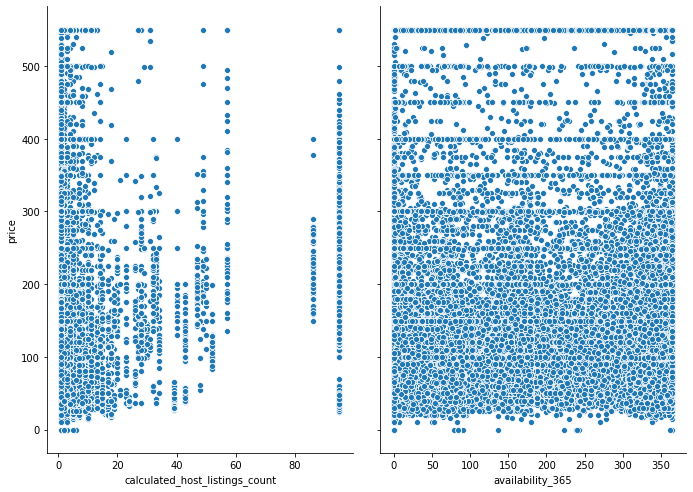

In [37]:
sns.pairplot(ny, x_vars=['calculated_host_listings_count','availability_365'], y_vars='price', size=7, aspect=0.7)

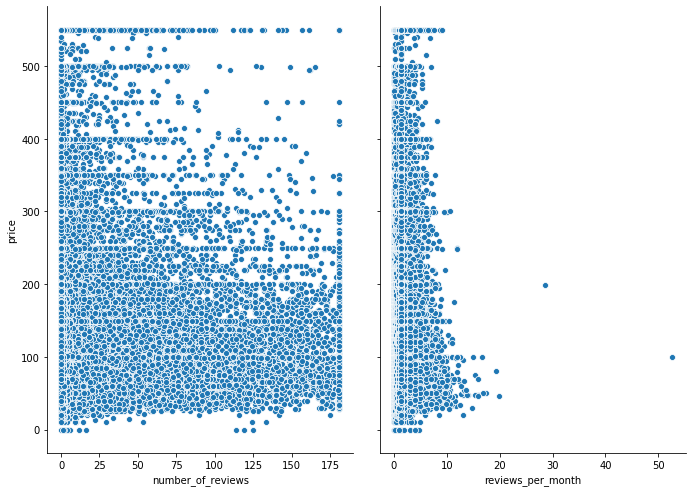

In [38]:
sns.pairplot(ny, x_vars=['number_of_reviews','reviews_per_month'], y_vars='price', size=7, aspect=0.7)

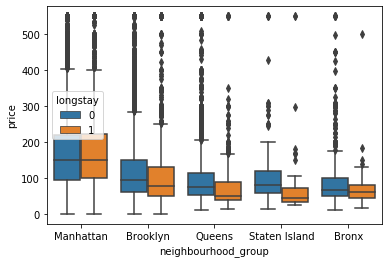

In [39]:
sns.boxplot(x="neighbourhood_group", y="price", hue="longstay", data=ny)


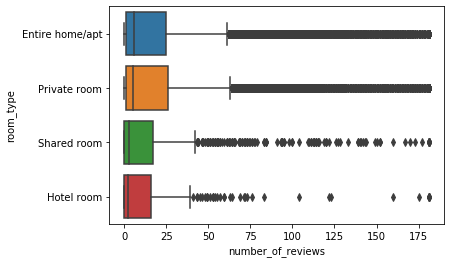

In [40]:
sns.boxplot( y=ny["room_type"], x=ny["number_of_reviews"] );
plt.show()

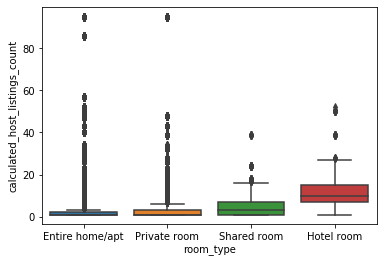

In [41]:
sns.boxplot( y=ny["calculated_host_listings_count"], x=ny["room_type"] );
plt.show()

In [42]:
ny.to_csv('ny.csv', header=True, index=False)